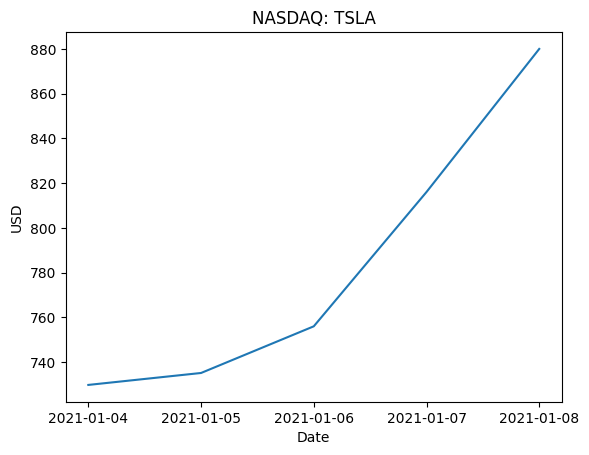

In [1]:
from matplotlib import pyplot as plt

days = ['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08']
prices = [729.77, 735.11, 755.98, 816.04, 880.02]

plt.plot(days,prices)
plt.title('NASDAQ: TSLA')
plt.xlabel('Date')
plt.ylabel('USD')
plt.show()

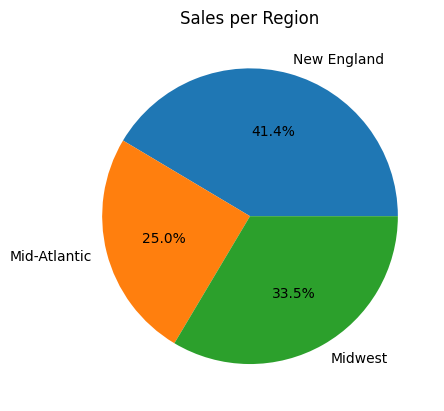

In [2]:
regions = ['New England', 'Mid-Atlantic', 'Midwest']
sales = [882703, 532648, 714406]

# autopct display percent values in the pie slices, using Python string
# formatting to show the values to the nearest tenth of a percent
plt.pie(sales, labels=regions, autopct='%1.1f%%')
plt.title('Sales per Region')
plt.show()

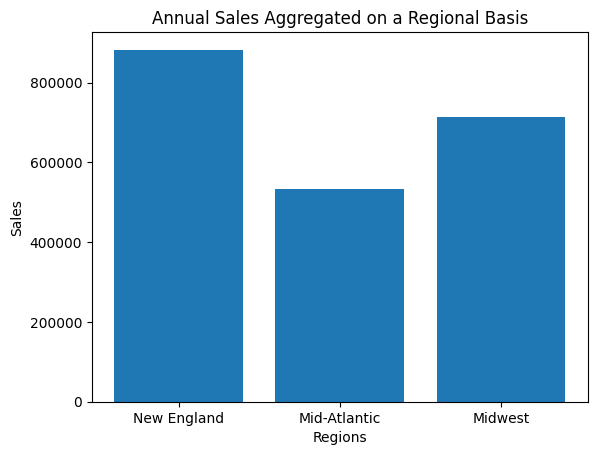

In [3]:
# Reuse same data to render a bar graph instead

plt.bar(regions, sales)
plt.xlabel("Regions")
plt.ylabel("Sales")
plt.title("Annual Sales Aggregated on a Regional Basis")
plt.show()

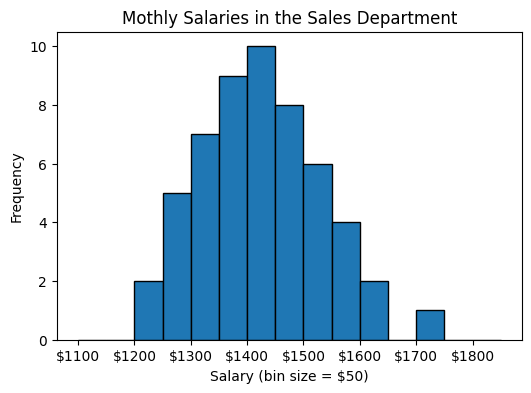

In [4]:
import numpy as np
import matplotlib.ticker as ticker

from matplotlib import pyplot as plt

salaries = [1215, 1221, 1263, 1267, 1271, 1274, 1275, 1318, 1320, 1324, 1324,
            1326, 1337, 1346, 1354, 1355, 1364, 1367, 1372, 1375, 1376, 1378,
            1378, 1410, 1415, 1415, 1418, 1420, 1422, 1426, 1430, 1434, 1437,
            1451, 1454, 1467, 1470, 1473, 1477, 1479, 1480, 1514, 1516, 1522,
            1529, 1544, 1547, 1554, 1562, 1584, 1595, 1616, 1626, 1717]

# Retrieves the Figure and Axes
fig, ax = plt.subplots()

# Resize Figure to have specific dimensions in inches
fig.set_size_inches(6, 4)

# Creates an Histogram
ax.hist(salaries,                       # Input data (Salaries)
        bins=np.arange(1100, 1900, 50), # Intervals to use
        edgecolor='black',              # Edge color
        linewidth=1)

# Format the X axis intervals
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.xaxis.set_major_formatter(formatter)

# Paint
plt.title('Mothly Salaries in the Sales Department')
plt.xlabel('Salary (bin size = $50)')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Use the salaries to draw a Pie Chart with salary shares instead of
# frequency

# Retrieve how many salaries fit in each $50 range
count, labels = np.histogram(salaries, bins=np.arange(1100, 1900, 50))

print(count)
print(labels)

[ 0  0  2  5  7  9 10  8  6  4  2  0  1  0  0]
[1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750
 1800 1850]


In [6]:
# Turn each range into labels with dollar amount format
labels = ['$'+str(labels[i])+'-'+str(labels[i+1]) for i, _ in enumerate(labels[1:])]
print(labels)

['$1100-1150', '$1150-1200', '$1200-1250', '$1250-1300', '$1300-1350', '$1350-1400', '$1400-1450', '$1450-1500', '$1500-1550', '$1550-1600', '$1600-1650', '$1650-1700', '$1700-1750', '$1750-1800', '$1800-1850']


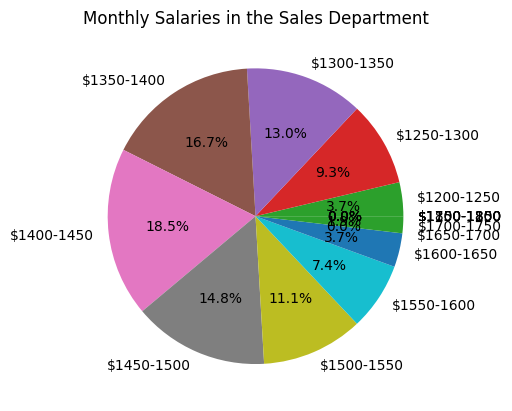

In [7]:
plt.pie(count, labels=labels, autopct='%1.1f%%')
plt.title('Monthly Salaries in the Sales Department')
plt.show()

In [8]:
# Exclude "zero" intervals from the count, retrieve the
# index for intervals with frequence > 0
non_zero_pos = [i for i, x in enumerate(count) if x > 0]
print(non_zero_pos)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 12]


In [9]:
# Filter count and labels with frequency 0
labels = [e for i, e in enumerate(labels) if i in non_zero_pos]
count = [e for i, e in enumerate(count) if i in non_zero_pos]

print(labels)
print(count)

['$1200-1250', '$1250-1300', '$1300-1350', '$1350-1400', '$1400-1450', '$1450-1500', '$1500-1550', '$1550-1600', '$1600-1650', '$1700-1750']
[2, 5, 7, 9, 10, 8, 6, 4, 2, 1]


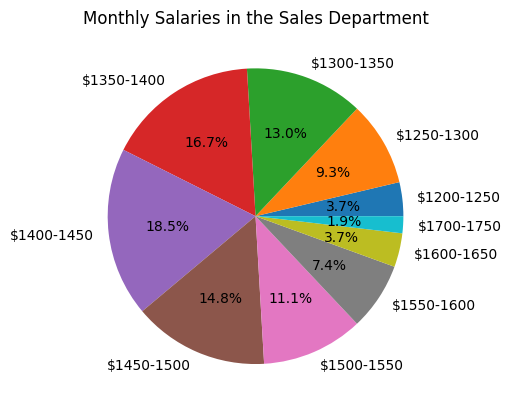

In [10]:
plt.pie(count, labels=labels, autopct='%1.1f%%')
plt.title('Monthly Salaries in the Sales Department')
plt.show()

In [11]:
index_freq_gt_five = [i for i, e in enumerate(count) if e > 5]
print(index_freq_gt_five)

[2, 3, 4, 5, 6]


In [12]:
labels_gt_five = [e for i, e in enumerate(labels) if i in index_freq_gt_five]
print(labels_gt_five)

['$1300-1350', '$1350-1400', '$1400-1450', '$1450-1500', '$1500-1550']


In [13]:
count_gt_five = [e for i, e in enumerate(count) if i in index_freq_gt_five]
print(count_gt_five)

[7, 9, 10, 8, 6]


In [14]:
count_lt_five = sum([c for c in count if c < 5])
print(count_lt_five)

9


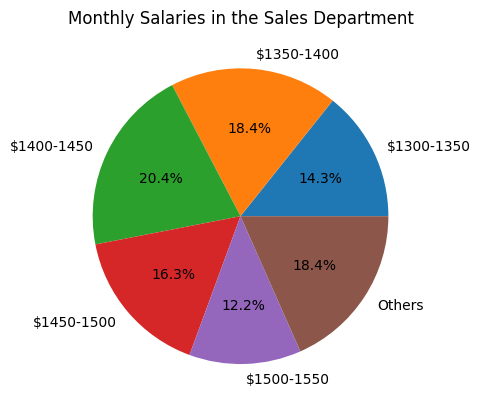

In [15]:
count_others = count_gt_five
count_others.append(count_lt_five)

label_others = labels_gt_five
label_others.append('Others')

plt.pie(count_others, labels=label_others, autopct='%1.1f%%')
plt.title('Monthly Salaries in the Sales Department')
plt.show()

## Plotting Pandas DataFrames

In [18]:
from requests import Session

US_CITIES_TOP_1K_CSV = 'datasets/us-cities-top-1k.csv'

def download():
    data_url = 'https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv'
    with Session() as s:
        download = s.get(data_url)
        decoded = download.content.decode('UTF-8')
        return decoded

def save_file(data):
    with open(US_CITIES_TOP_1K_CSV, 'w') as csv_file:
        csv_file.write(data)

def read_file():
    with open(US_CITIES_TOP_1K_CSV, 'r') as csv_file:
        return csv_file.read()

# save_file(download())

us_cities_csv = read_file()
print(us_cities_csv)

City,State,Population,lat,lon
Marysville,Washington,63269,48.0517637,-122.1770818
Perris,California,72326,33.7825194,-117.22864779999999
Cleveland,Ohio,390113,41.499320000000004,-81.6943605
Worcester,Massachusetts,182544,42.262593200000005,-71.8022934
Columbia,South Carolina,133358,34.0007104,-81.0348144
Waterbury,Connecticut,109676,41.558152500000006,-73.0514965
Eagan,Minnesota,65453,44.804132200000005,-93.1668858
Southfield,Michigan,73006,42.473368799999996,-83.2218731
Lafayette,Louisiana,124276,30.2240897,-92.0198427
Boise City,Idaho,214237,43.6187102,-116.2146068
Elkhart,Indiana,51265,41.6819935,-85.9766671
Buena Park,California,82882,33.867514299999996,-117.99811809999999
Marietta,Georgia,59089,33.952602,-84.5499327
Parker,Colorado,48608,39.5186002,-104.76136329999999
West Palm Beach,Florida,102436,26.7153424,-80.0533746
Salem,Massachusetts,42544,42.51954,-70.8967155
Aurora,Illinois,199963,41.7605849,-88.3200715
Leesburg,Virginia,47673,39.1156615,-77.5636015
Doral,Florida,50213,25

In [21]:
import pandas as pd

from io import StringIO

# convert string into string buffer
us_cities_csv = StringIO(us_cities_csv)
us_cities = pd.read_csv(us_cities_csv)
display(us_cities)

,City,State,Population,lat,lon
0,Marysville,Washington,63269,48.051764,-122.177082
1,Perris,California,72326,33.782519,-117.228648
2,Cleveland,Ohio,390113,41.499320,-81.694361
3,Worcester,Massachusetts,182544,42.262593,-71.802293
4,Columbia,South Carolina,133358,34.000710,-81.034814
...,...,...,...,...,...
995,West New York,New Jersey,52122,40.787879,-74.014306
996,Everett,Massachusetts,42935,42.408430,-71.053663
997,Linden,New Jersey,41301,40.622048,-74.244590
998,Asheville,North Carolina,87236,35.595058,-82.551487


In [23]:
# Retrieve cities with Population >= 1m
top_us_cities = us_cities[us_cities.Population.ge(1000000)]
display(top_us_cities)

,City,State,Population,lat,lon
53,Philadelphia,Pennsylvania,1553165,39.952584,-75.165222
59,Dallas,Texas,1257676,32.776664,-96.796988
153,San Antonio,Texas,1409019,29.424122,-98.493628
333,San Diego,California,1355896,32.715738,-117.161084
594,Chicago,Illinois,2718782,41.878114,-87.629798
646,Houston,Texas,2195914,29.760427,-95.369803
890,New York,New York,8405837,40.712784,-74.005941
953,Los Angeles,California,3884307,34.052234,-118.243685
966,Phoenix,Arizona,1513367,33.448377,-112.074037


In [25]:
# Group by State
top_us_cities_count = top_us_cities.groupby(['State'], as_index = False).count().rename(columns={'City': 'cities_count'})[['State', 'cities_count']]
display(top_us_cities_count)

,State,cities_count
0,Arizona,1
1,California,2
2,Illinois,1
3,New York,1
4,Pennsylvania,1
5,Texas,3


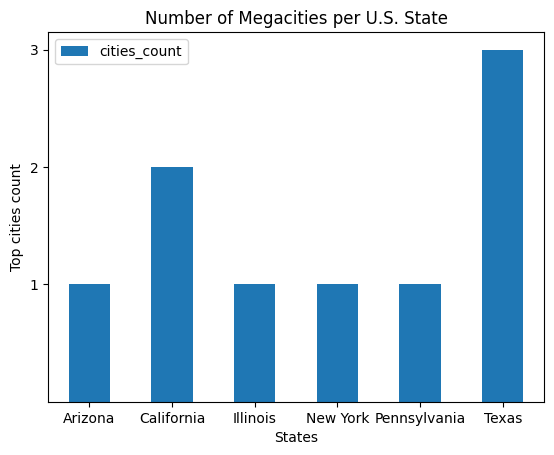

In [28]:
top_us_cities_count.plot.bar('State', 'cities_count', rot=0)
plt.xlabel('States')
plt.ylabel('Top cities count')
plt.title('Number of Megacities per U.S. State')
plt.yticks(range(min(top_us_cities_count['cities_count']),
                max(top_us_cities_count['cities_count'])+1))
plt.show()